# Tarea 1: Reconocimiento basico
Reconocimiento de Patrones (IIC2233)

Primer semestre 2024

Pedro Pablo Zavala Tejos

# 0. Initial Setup

In [154]:
import numpy as np
import matplotlib.pyplot as plt # Libreria para realizar gr치ficos
import cv2 # Libreria para procesamiento morfol칩gico de imagenes

# 1. Image Loading


Cargamos los datos


In [155]:
!wget https://www.dropbox.com/scl/fi/5n62okx5uosbdtvwyzova/kchipun.zip?rlkey=obnuogv12isstmblsrdmekjkb&dl=0 # Cargamos los datos

In [156]:
!mv kchipun.zip?rlkey=obnuogv12isstmblsrdmekjkb kchipun.zip

zsh:1: no matches found: kchipun.zip?rlkey=obnuogv12isstmblsrdmekjkb


In [157]:
!unzip -qq kchipun.zip # descomprimimos el archivo

unzip:  cannot find or open kchipun.zip, kchipun.zip.zip or kchipun.zip.ZIP.


In [158]:
# Funciones para cargar la imagen
def num2fixstr(x: int, d: int) -> str:
    """
    Funcion que retorna un numero x de d digitos

    """
    string = '%0*d' % (d, x)
    return string

def get_image_path(num_class: int, num_img: int, sep='_') -> str:
    BASE_URL = 'kchipun/img_'
    DIGITS_CLASS = 2
    DIGITS_IMG = 4
    path = f'{BASE_URL}{num2fixstr(num_class, DIGITS_CLASS)}{sep}{num2fixstr(num_img, DIGITS_IMG)}.png'
    return path

def imageload(num_class: int, num_img: int, echo='off') -> str:
    """
    Funcion que retorna la ruta de cada imagen
    """
    path = get_image_path(num_class, num_img)
    if echo == 'on':
      print(f'loading image {path} ...')
    img = cv2.imread(path, 0)
    return img

def plot_image(num_class: int, num_img: int, echo='off') -> str:
    """
    Funcion que retorna la imagen num_img de clase num_class
    """
    img = imageload(num_class, num_img, echo='on')
    plt.imshow(img, cmap='gray')

loading image kchipun/img_01_0001.png ...


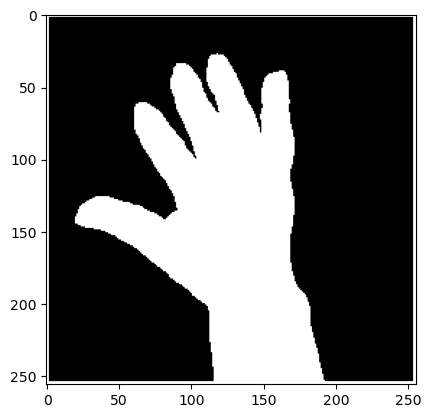

In [159]:
# Veamos el siguiente ejemplo para cargar la primera imagen de cada clase
# 01: Papel; 02: Piedra; 03: Tijera

# Imagen binaria clase papel
plot_image(1, 1)

loading image kchipun/img_02_0001.png ...


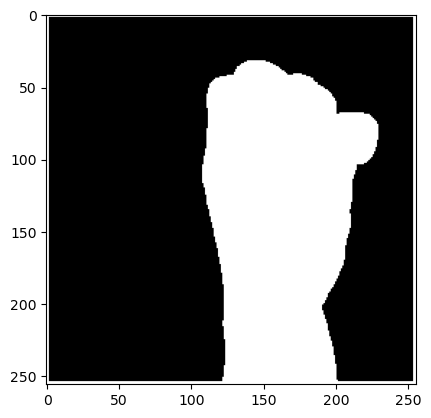

In [160]:
# Imagen binaria clase piedra
plot_image(2, 1)

loading image kchipun/img_03_0001.png ...


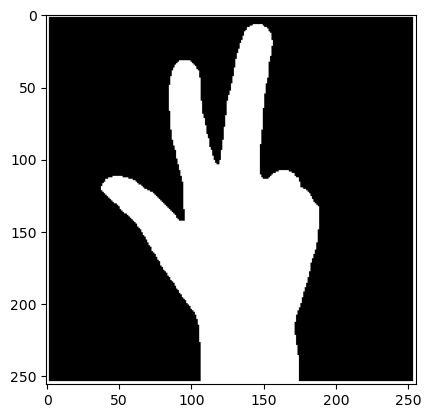

In [161]:
# Imagen binaria clase tijera
plot_image(3, 1)

# 2. Feature Extraction

In [238]:
def erode(img): 
    return cv2.erode(img, np.ones((5,5), np.uint8), iterations=3)

def close(img):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))

def dilate(img):
    return cv2.dilate(img, kernel=np.ones((3,3), np.uint8), iterations = 3)

def border(img): 
    kernel = np.ones((2,2), np.uint8)
    erode_img = erode(img)
    border_img = cv2.morphologyEx(erode_img, cv2.MORPH_GRADIENT, kernel)
    border_img = close(border_img)
    return border_img

def delete_frame(img):
    return dilate(erode(img))

def rotate_and_flip(img):
    rotate_img = np.rot90(dilate(erode(img)), k=1)
    flip_img = np.flip(rotate_img, axis=0)
    return flip_img


In [388]:
def get_region(img):
    return img == 255

def center_of_mass(img) -> tuple: 
    region = get_region(img) # region de la imagen 
    region_coords = np.argwhere(region) # coordenadas que pertenecen a la region con valor distinto de 0

    region_coords_i = region_coords[:,0] # coordenadas i
    region_coords_j = region_coords[:,1] # coordenadas j
    
    coords_i_sum = np.sum(region_coords_i) 
    coords_j_sum = np.sum(region_coords_j) 
    area = np.sum(region) 

    return (coords_i_sum / area, coords_j_sum / area) 

def extreme_points(img) -> tuple:
    region_coords = np.argwhere(get_region(img))

    region_axis_j = region_coords[:,0]
    region_axis_i = region_coords[:,1]

    top = tuple(region_coords[region_axis_i.argmin()])
    bottom = tuple(region_coords[region_axis_i.argmax()])
    left = tuple(region_coords[region_axis_j.argmin()])
    right = tuple(region_coords[region_axis_j.argmax()])
    
    return top, bottom, left, right

def distance_between_extreme_points(*points):
    distances = np.array([])

    for i in range(len(points)):
        if i == len(points) - 1:
            distance_between = euclidean_distance(points[i], points[0])
        else:
            distance_between = euclidean_distance(points[i], points[i+1])
        
        distances = np.append(distances, distance_between)
    
    return distances

# def distance_between_cm(*points, center):
#     distances = np.array([])
#     for point in points:
#         distance = euclidean_distance(point, center)
#         distances = np.append(distances, distance)
#     return distances


def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def get_sum_extreme_points(distances):
    return np.sum(distances)

# def normalize_distance(distances):
#     return (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# def get_proportion(points_distances, center_distances):
#     proportion = np.sum(points_distances) / np.sum(center_distances)
#     return proportion

def get_feature_data(img):
    img = delete_frame(img)
    top, bottom, left, right = extreme_points(img)
    distances = distance_between_extreme_points(top, bottom, left, right)
    sum_distances = get_sum_extreme_points(distances)
    return sum_distances

668.3138642080864


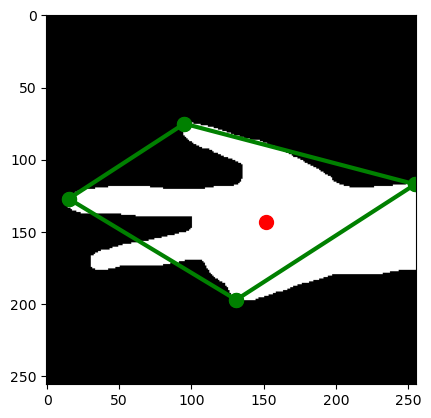

In [396]:

test_image = imageload(3, 2)
processed_image = delete_frame(test_image)
top, bottom, left, right = extreme_points(processed_image)
center = center_of_mass(processed_image)
distances = distance_between_extreme_points(top, bottom, left, right)
sum_distances = get_sum_extreme_points(distances)
print(sum_distances)


plt.plot(*center, 'ro', markersize=10)
plt.plot([top[0], right[0]], [top[1], right[1]], 'go', linestyle='-', linewidth=3, markersize=10)
plt.plot([top[0], left[0]], [top[1], left[1]], 'go', linestyle='-', linewidth=3, markersize=10)
plt.plot([bottom[0], left[0]], [bottom[1], left[1]], 'go', linestyle='-', linewidth=3, markersize=10)
plt.plot([bottom[0], right[0]], [bottom[1], right[1]], 'go', linestyle='-', linewidth=3, markersize=10)

plt.imshow(rotate_and_flip(test_image), cmap='gray')
plt.show()


In [389]:
K = 3 # Cantidad de clases
N = 50 # Numero de muestras por clases

X = np.zeros((N * K, )) # Creamos un arreglo de tama침o N * K con las caracteristicas
Y = np.zeros((N * K, )) # Creamos nuestra variable de respuesta (con las clases)
index = 0

for k in range(1, K + 1):
    for i in range(1, N + 1):
        img = imageload(k, i, echo='on')
        X[index] = get_feature_data(img)
        Y[index] = K

        index += 1

loading image kchipun/img_01_0001.png ...
loading image kchipun/img_01_0002.png ...
loading image kchipun/img_01_0003.png ...
loading image kchipun/img_01_0004.png ...
loading image kchipun/img_01_0005.png ...
loading image kchipun/img_01_0006.png ...
loading image kchipun/img_01_0007.png ...
loading image kchipun/img_01_0008.png ...
loading image kchipun/img_01_0009.png ...
loading image kchipun/img_01_0010.png ...
loading image kchipun/img_01_0011.png ...
loading image kchipun/img_01_0012.png ...
loading image kchipun/img_01_0013.png ...
loading image kchipun/img_01_0014.png ...
loading image kchipun/img_01_0015.png ...
loading image kchipun/img_01_0016.png ...
loading image kchipun/img_01_0017.png ...
loading image kchipun/img_01_0018.png ...
loading image kchipun/img_01_0019.png ...
loading image kchipun/img_01_0020.png ...
loading image kchipun/img_01_0021.png ...
loading image kchipun/img_01_0022.png ...
loading image kchipun/img_01_0023.png ...
loading image kchipun/img_01_0024.

# 3. Training and testing subsets

In [390]:
# Datos de entrenamiento de las primeras 40 imagenes de cada clase
x0_train = X[0:40]
x1_train = X[50:90]
x2_train = X[100:140]

# Datos de testeo de las ultimas 10 imagenes de cada clase
x0_test = X[40:50]
x1_test = X[90:100]
x2_test = X[140:150]

# Estadisticas de cada clase
# Maximo de cada clase
x0_max = np.max(x0_train)
x1_max = np.max(x1_train)
x2_max = np.max(x2_train)
# Minimo de cada clase
x0_min = np.min(x0_train)
x1_min = np.min(x1_train)
x2_min = np.min(x2_train)
# Promedio de cada clase
x0_mean = np.mean(x0_train)
x1_mean = np.mean(x1_train)
x2_mean = np.mean(x2_train)


print('Statistics')

print('Class 0 (paper):')
print('>>>> min  = '+str(x0_min))
print('>>>> mean = '+str(x0_mean))
print('>>>> max  = '+str(x0_max))
print(' ')

print('Class 1 (scissors):')
print('>>>> min  = '+str(x1_min))
print('>>>> mean = '+str(x1_mean))
print('>>>> max  = '+str(x1_max))

print('Class 2 (rock):')
print('>>>> min  = '+str(x2_min))
print('>>>> mean = '+str(x2_mean))
print('>>>> max  = '+str(x2_max))


Statistics
Class 0 (paper):
>>>> min  = 454.788256491838
>>>> mean = 786.7456762960426
>>>> max  = 937.4077823834282
 
Class 1 (scissors):
>>>> min  = 550.7922521701188
>>>> mean = 598.4905083156184
>>>> max  = 830.0686506393829
Class 2 (rock):
>>>> min  = 503.24249582873216
>>>> mean = 667.4780910493813
>>>> max  = 797.1860981701975


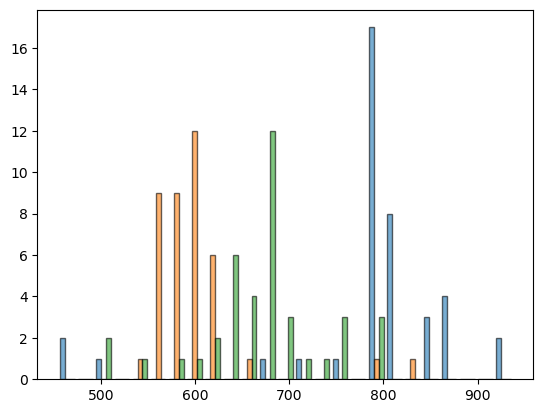

In [391]:
# Histograma de an치lisis de caracteristicas 
plt.hist([x0_train, x1_train, x2_train], bins=25, label=['paper', 'scissors', 'rock'], alpha=0.6, histtype='bar', ec='black')
plt.show()

# 4. Classification

In [392]:
threshold_1 = (x0_mean + x1_mean) / 2
threshold_2 = (x1_mean + x2_mean) / 2

def classifier(x):
    if x < threshold_1:
        return 1
    elif threshold_1 <= x < threshold_2:
        return 2
    else:
        return 3
    
Y = np.array([classifier(x) for x in X])

Y0_train = Y[0:40]
Y1_train = Y[50:90]
Y2_train = Y[100:140]

Y0_test = Y[40:50]
Y1_test = Y[90:100]
Y2_test = Y[140:150]

# 5. Evaluation

In [393]:
def evaluation(Y):
    confusion_matrix = np.zeros((3, 3))
    
    total_true_samples = 0
    total_samples = 0

    for i in range(0, K):
        true_sample  = np.sum(Y[i] == i + 1)
        false_sample = np.sum(Y[i] != i + 1)

        confusion_matrix[i, i] = true_sample # celdas en la diagonal
        confusion_matrix[i, (i + 1) % K] = false_sample # celdas no en la diagonal

        total_true_samples += true_sample
        total_samples += (true_sample + false_sample)

    accuracy = round(total_true_samples * 100 / total_samples, 3)

    return confusion_matrix, accuracy

def print_results(confusion_matrix, accuracy, type):

    print('Testing Confusion Matrix:')
    print(confusion_matrix[0,:])
    print(confusion_matrix[1,:])
    print(confusion_matrix[2,:])

    
    print(f'\n{type} Accuracy = {accuracy}%')

def total_accuracy(acc_test, acc_train):
    return 0.20 * acc_train + 0.8 * acc_test

In [394]:

Y_test = [Y0_test, Y1_test, Y2_test]
confusion_matrix, AccTest = evaluation(Y_test)
print_results(confusion_matrix, AccTest, type='Testing')

Testing Confusion Matrix:
[3. 7. 0.]
[ 0.  0. 10.]
[7. 0. 3.]

Testing Accuracy = 20.0%


In [395]:
Y_train = [Y0_train, Y1_train, Y2_train]
confusion_matrix_2, AccTrain = evaluation(Y_train)
print_results(confusion_matrix_2, AccTrain, type='Training')

Testing Confusion Matrix:
[ 4. 36.  0.]
[ 0.  0. 40.]
[32.  0.  8.]

Training Accuracy = 10.0%


In [ ]:
AccTot = total_accuracy(AccTest, AccTrain)
print(f'Total Accuracy = {AccTot}')

Total Accuracy = 32.333
